In [22]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u

In [23]:
hdu = fits.open('lambda_mollweide_sfd_ebv.fits')
temp_data = hdu[1].data
n_obs = hdu[2].data
header = hdu[1].header

refY = header['CRPIX2']
refX = header['CRPIX1']
#header
#hdu.info()

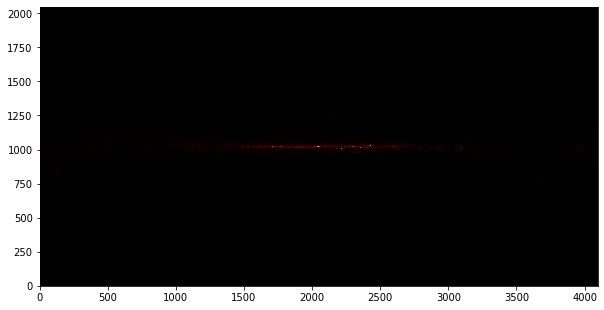

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(temp_data,cmap='afmhot',origin='lower')

Text(0.5, 1.0, 'Full-sky reddening map')

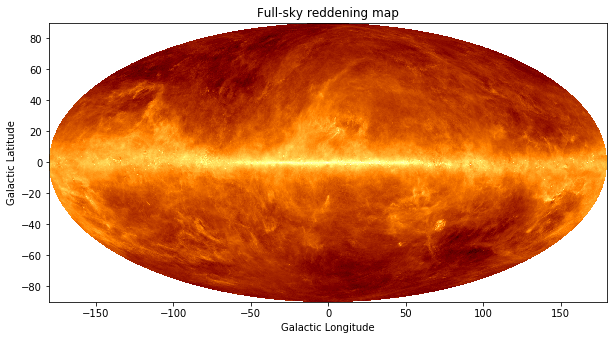

In [25]:
plt.figure(figsize=(10,10))
ax = plt.imshow(temp_data,cmap='afmhot',extent=[-180,180,-90,90],origin='lower',norm=LogNorm())
#lognorm cuz it scales intensity logarithmically. 
#using it cuz intensity range is lage (max value > 100 times larger than min value)
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.title('Full-sky reddening map')

In [26]:
x = np.linspace(180,-180,4096)  #longitude in 1 degree bins. 
y0 = 1023  #reference y-point. Then I take the +/- 1 degree and average, confirmed by Prof. 
data = temp_data[y0-11:y0+12]  #slicing to get average. |b|<1

avgData = []
for i in range(len(data[0])):
    colAvg = np.average(data[:,i])
    avgData.append(colAvg)

In [27]:
minT = np.amin(avgData)  #use the averaged reddening data to calculate statistics. 
maxT = np.amax(avgData)
medianT = np.median(avgData)
meanT = np.mean(avgData)
stdT = np.std(avgData)
print('Minimum: ', minT)
print('Maximum: ', maxT)
print('Mean: ', meanT)
print('Median: ', medianT)
print('Standard Deviation: ', stdT)

Minimum:  0.0
Maximum:  41.62033
Mean:  5.6605945
Median:  2.5240998
Standard Deviation:  6.071427


Text(0.5, 1.0, 'Average Galactic Reddenning within $|b|<1^\\circ$')

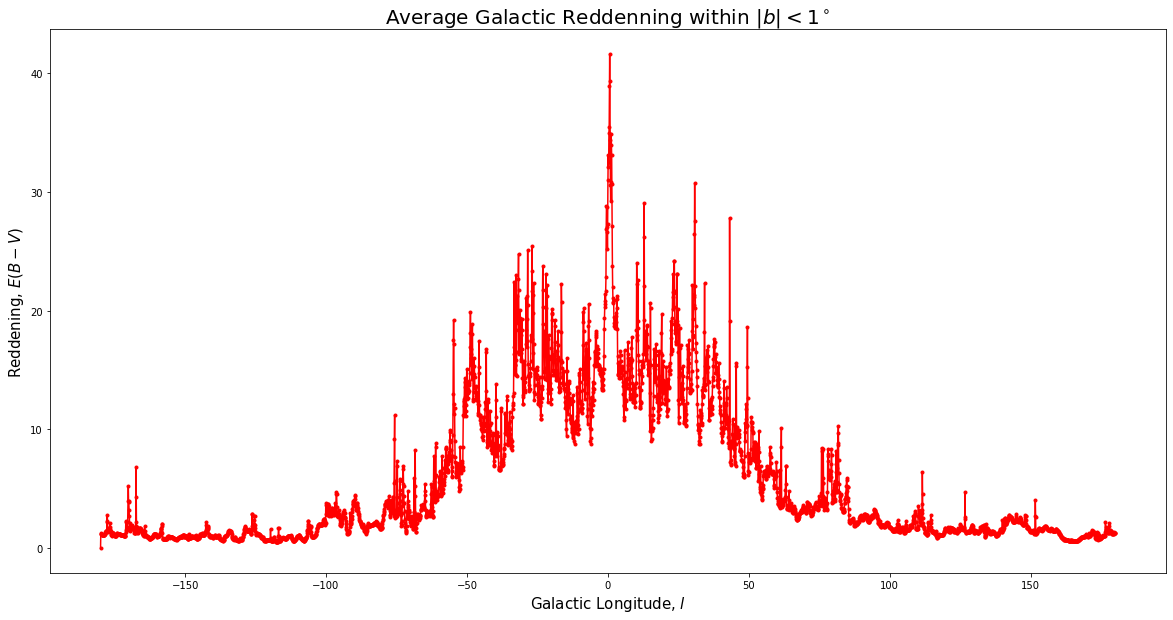

In [28]:
plt.figure(figsize=(20,10))
plt.plot(x,avgData,'.-r')
plt.xlabel(r'Galactic Longitude, $l$', fontsize=15)
plt.ylabel(r'Reddening, $E(B-V)$', fontsize=15)
plt.title(r'Average Galactic Reddenning within $|b|<1^\circ$', fontsize=20)